<a href="https://colab.research.google.com/github/mads5/Experiments/blob/master/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas_datareader as web
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
days = 60
stock = 'ONGC.NS'

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
#Get the stock data
df = web.DataReader(stock, data_source='yahoo', start='2010-01-01', end='2020-05-05')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,198.832993,196.000000,196.167007,197.908005,1905762.0,117.540398
2010-01-05,202.500000,198.192001,198.682999,201.375000,4657392.0,119.599464
2010-01-06,204.500000,201.199997,202.016998,203.917007,4203690.0,121.109222
2010-01-07,205.817001,201.667007,203.500000,204.132996,6394536.0,121.237511
2010-01-08,206.432999,201.667007,204.167007,202.617004,5678652.0,120.337105
...,...,...,...,...,...,...
2020-04-28,69.699997,67.099998,67.800003,69.199997,20422626.0,69.199997
2020-04-29,70.949997,68.699997,69.400002,70.500000,18023637.0,70.500000
2020-04-30,81.050003,71.500000,72.599998,79.900002,54290691.0,79.900002


In [0]:
#Get the number of rows and columns in data set
df.shape

(2544, 6)

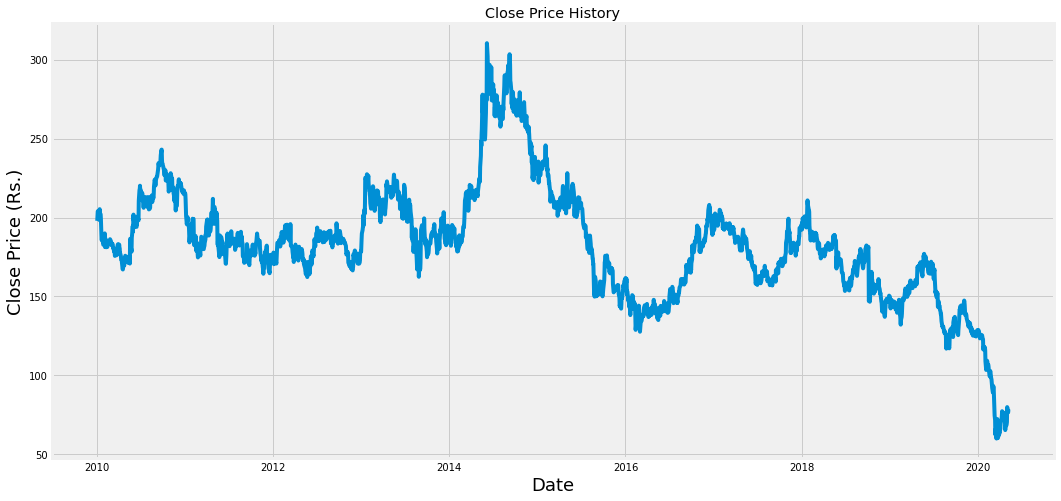

In [0]:
#Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rs.)', fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2036

In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.55067821],
       [0.56452222],
       [0.57467266],
       ...,
       [0.07946237],
       [0.06608555],
       [0.07367238]])

In [0]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(days, len(train_data)):
  x_train.append(train_data[i-days:i, 0])
  y_train.append(train_data[i, 0])
  if i <= days+1:
    print(x_train)
    print(y_train)
    print()

[array([0.55067821, 0.56452222, 0.57467266, 0.57553512, 0.56948164,
       0.57001271, 0.55301017, 0.55590512, 0.58016315, 0.56555241,
       0.56738524, 0.55690339, 0.53317648, 0.51906896, 0.50213028,
       0.50649071, 0.49840474, 0.49404431, 0.49008316, 0.49351319,
       0.49587311, 0.51497601, 0.51883335, 0.48426121, 0.50455808,
       0.49663979, 0.48383001, 0.49264671, 0.48469247, 0.49447551,
       0.49227936, 0.49481099, 0.49900368, 0.49747032, 0.49347724,
       0.49331358, 0.49903567, 0.5041947 , 0.49850454, 0.49304604,
       0.48918469, 0.48882136, 0.49281445, 0.48995136, 0.48486021,
       0.48166573, 0.48229665, 0.47238182, 0.4732483 , 0.47484557,
       0.46199978, 0.46376473, 0.46529406, 0.47201441, 0.46362898,
       0.47910218, 0.48785502, 0.49068209, 0.49161651, 0.48213294])]
[0.4904505002261098]

[array([0.55067821, 0.56452222, 0.57467266, 0.57553512, 0.56948164,
       0.57001271, 0.55301017, 0.55590512, 0.58016315, 0.56555241,
       0.56738524, 0.55690339, 0.533

In [0]:
#Convert x_trtain and y_train dataset to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1976, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1976/1976 [==============================] - 71s 36ms/step - loss: 0.0020


In [0]:
#Create the testing dataset
#Create a new array containing scaled values from index 1576 to 2003
test_data = scaled_data[training_data_len - days:, :]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(days, len(test_data)):
  x_test.append(test_data[i-days:i, 0])

In [0]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [0]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(508, 60, 1)

In [0]:
#Get the model to predict values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
#Get the root mean squares error (RMSE)
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

11.709079861373661

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


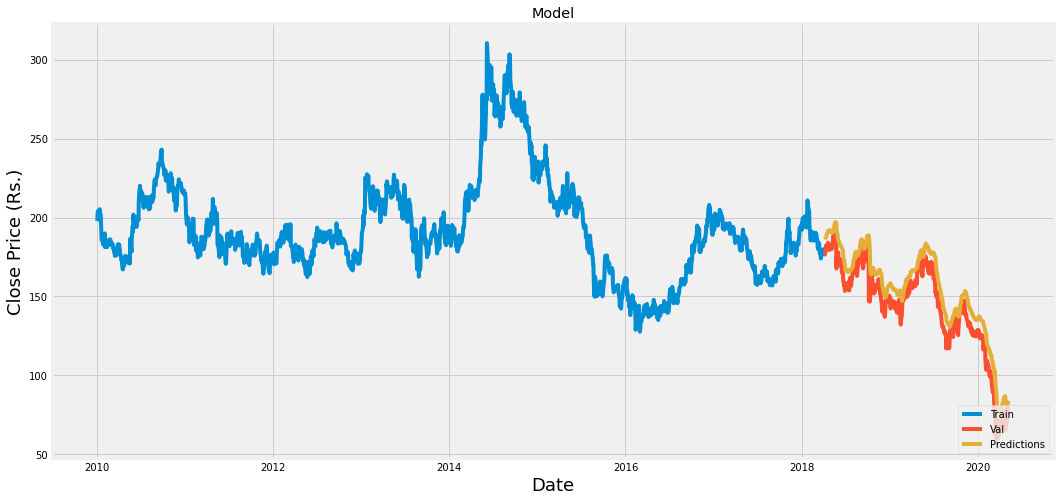

In [0]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rs.)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [0]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-04-05,177.449997,187.686432
2018-04-06,176.949997,187.464172
2018-04-09,178.399994,187.244247
2018-04-10,180.199997,187.261490
2018-04-11,182.149994,187.629974
...,...,...
2020-04-28,69.199997,82.210640
2020-04-29,70.500000,81.760719
2020-04-30,79.900002,81.665222


In [0]:
#Get the quote
vipind_quote = web.DataReader(stock, data_source='yahoo', start='2012-01-01', end='2020-05-05')
#Create a new dataframe
new_df = vipind_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-days:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[85.35332]]


In [0]:
#Get the quote
apple_quote2 = web.DataReader(stock, data_source='yahoo', start='2020-05-01', end='2020-05-05')
print(apple_quote2['Close'])

Date
2020-05-04    76.550003
2020-05-05    78.449997
Name: Close, dtype: float64
